In [1]:
import pandas as pd
import pyreadstat
import pprint

import warnings
warnings.filterwarnings('ignore')

# Formatting Datasets

Adding average overall scores to each data set. Overall scores for teachers are calculated by average of all the students for the teachers. Overall scores for schools are calcuated by average of all the teacher scores for the school.

Datasets for Iran

In [2]:
iran_teach, iran_teach_meta = pyreadstat.read_sav('ATGIRNR4.sav')
iran_school, iran_school_meta = pyreadstat.read_sav('ACGIRNR4.sav')
iran_score, iran_score_meta = pyreadstat.read_sav('ASTIRNR4.sav')

In [3]:
iran_score_good = iran_score[['IDSCHOOL','IDTEALIN','ASRREA01','ASRREA02','ASRREA03','ASRREA04','ASRREA05']]
REAcol = iran_score_good.loc[: , "ASRREA01":"ASRREA05"]
iran_score_good['OVR_SCORE'] = REAcol.mean(axis=1)
iran_score_final = iran_score_good[['IDSCHOOL','IDTEALIN','OVR_SCORE']]

In [4]:
iran_score_final = iran_score_final.groupby(['IDSCHOOL','IDTEALIN'], as_index=False).mean()
iran_score_final2 = iran_score_final.groupby(['IDSCHOOL'], as_index=False).mean()

In [5]:
iran_teach_good = iran_teach.merge(iran_score_final, how='left')
iran_school_good = iran_school.merge(iran_score_final2, how='left')

Datasets for Azerbaijan 

In [6]:
aze_teach, aze_teach_meta = pyreadstat.read_sav('ATGAZER4.sav')
aze_school, aze_school_meta = pyreadstat.read_sav('ACGAZER4.sav')
aze_score, aze_score_meta = pyreadstat.read_sav('ASTAZER4.sav')

aze_score_good = aze_score[['IDSCHOOL','IDTEALIN','ASRREA01','ASRREA02','ASRREA03','ASRREA04','ASRREA05']]
aze_col = aze_score_good.loc[: , "ASRREA01":"ASRREA05"]
aze_score_good['OVR_SCORE'] = aze_col.mean(axis=1)
aze_score_final = aze_score_good[['IDSCHOOL','IDTEALIN','OVR_SCORE']]
aze_score_final = aze_score_final.groupby(['IDSCHOOL','IDTEALIN'], as_index=False).mean()
aze_score_final2 = aze_score_final.groupby(['IDSCHOOL'], as_index=False).mean()
aze_teach_good = aze_teach.merge(aze_score_final, how='left')
aze_school_good = aze_school.merge(aze_score_final2, how='left')

aze_teach_good = aze_teach_good[pd.notnull(aze_teach_good['OVR_SCORE'])]
aze_school_good = aze_school_good[pd.notnull(aze_school_good['OVR_SCORE'])]

Datasets for Ireland

In [7]:
irl_teach, irl_teach_meta = pyreadstat.read_sav('ATGIRLR4.sav')
irl_school, irl_school_meta = pyreadstat.read_sav('ACGIRLR4.sav')
irl_score, irl_score_meta = pyreadstat.read_sav('ASTIRLR4.sav')

irl_score_good = irl_score[['IDSCHOOL','IDTEALIN','ASRREA01','ASRREA02','ASRREA03','ASRREA04','ASRREA05']]
irl_col = irl_score_good.loc[: , "ASRREA01":"ASRREA05"]
irl_score_good['OVR_SCORE'] = irl_col.mean(axis=1)
irl_score_final = irl_score_good[['IDSCHOOL','IDTEALIN','OVR_SCORE']]
irl_score_final = irl_score_final.groupby(['IDSCHOOL','IDTEALIN'], as_index=False).mean()
irl_score_final2 = irl_score_final.groupby(['IDSCHOOL'], as_index=False).mean()
irl_teach_good = irl_teach.merge(irl_score_final, how='left')
irl_school_good = irl_school.merge(irl_score_final2, how='left')

irl_teach_good = irl_teach_good[pd.notnull(irl_teach_good['OVR_SCORE'])]
irl_school_good = irl_school_good[pd.notnull(irl_school_good['OVR_SCORE'])]

Datasets for Norway

In [8]:
nor_teach, nor_teach_meta = pyreadstat.read_sav('ATGNORR4.sav')
nor_school, nor_school_meta = pyreadstat.read_sav('ACGNORR4.sav')
nor_score, nor_score_meta = pyreadstat.read_sav('ASTNORR4.sav')

nor_score_good = nor_score[['IDSCHOOL','IDTEALIN','ASRREA01','ASRREA02','ASRREA03','ASRREA04','ASRREA05']]
nor_col = nor_score_good.loc[: , "ASRREA01":"ASRREA05"]
nor_score_good['OVR_SCORE'] = nor_col.mean(axis=1)
nor_score_final = nor_score_good[['IDSCHOOL','IDTEALIN','OVR_SCORE']]
nor_score_final = nor_score_final.groupby(['IDSCHOOL','IDTEALIN'], as_index=False).mean()
nor_score_final2 = nor_score_final.groupby(['IDSCHOOL'], as_index=False).mean()
nor_teach_good = nor_teach.merge(nor_score_final, how='left')
nor_school_good = nor_school.merge(nor_score_final2, how='left')

All datasets merged

In [9]:
all_teach_good = pd.concat([iran_teach_good,aze_teach_good,irl_teach_good,nor_teach_good], ignore_index = True)
all_school_good = pd.concat([iran_school_good,aze_school_good,irl_school_good,nor_school_good], ignore_index = True)

In [10]:
all_teach_good['IDCNTRY'].replace({364:"IRAN",372:"IRELAND",31:"AZERBAIJAN",578:"NORWAY"}, inplace = True)
all_school_good['IDCNTRY'].replace({364:"IRAN",372:"IRELAND",31:"AZERBAIJAN",578:"NORWAY"}, inplace = True)

all_teach_good = all_teach_good[pd.notnull(all_teach_good['OVR_SCORE'])]
all_school_good = all_school_good[pd.notnull(all_school_good['OVR_SCORE'])]

all_teach_good['UN_INDEX'] = all_teach_good.IDCNTRY.apply(lambda x: 1 if (x == "NORWAY") or (x == "IRELAND") else 0)
all_school_good['UN_INDEX'] = all_school_good.IDCNTRY.apply(lambda x: 1 if (x == "NORWAY") or (x == "IRELAND") else 0)

# Graphing Functions

In [11]:
import seaborn as sns
import numpy as np
%matplotlib inline

def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
    medians = data.groupby([predictor])[outcome].median().values
    #medians[0], medians[1] = medians[1], medians[0]
    median_labels = [str(np.round(s, 2)) for s in medians]
    
    boxplot = sns.boxplot(x=predictor,y=outcome,data=data,width=0.5,palette="Set3", showfliers=False)
    
    pos = range(len(medians))
    for tick,label in zip(pos,boxplot.get_xticklabels()):
        boxplot.text(pos[tick], medians[tick] + 5, median_labels[tick], 
            horizontalalignment='center', size='x-small', color='black', weight='semibold')
    
    boxplot.set(
        xlabel=xlabel, 
        ylabel=ylabel)
    
    boxplot.figure.savefig(savename,
                    format='jpeg',
                    dpi=300)

In [12]:
def sctplt(data,predictor,outcome,xlabel,ylabel,savename):
    
    splot = sns.lmplot(predictor,outcome,data,fit_reg=False)
    
    splot.set(xlabel=xlabel, ylabel=ylabel)
    
    splot.savefig(savename,
                    format='jpeg',
                    dpi=300)

In [13]:
def epsilon2(h, n):
    return h/((n**2 - 1)/(n+1))

# Per country analysis (within country)

## Iran

### Iran Teacher Variables

Teaching experience correlation to overall score: 0.277


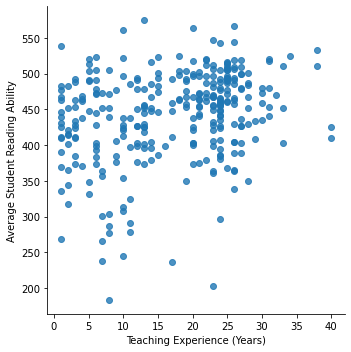

In [14]:
teach_exp_corr = iran_teach_good['ATBG01'].corr(iran_teach_good['OVR_SCORE'])
print('Teaching experience correlation to overall score: %.3f' % teach_exp_corr)
sctplt(iran_teach_good, 'ATBG01', 'OVR_SCORE', 'Teaching Experience (Years)', 'Average Student Reading Ability', 'IRANTeachExp.jpeg')

Class size correlation to overall score: 0.270


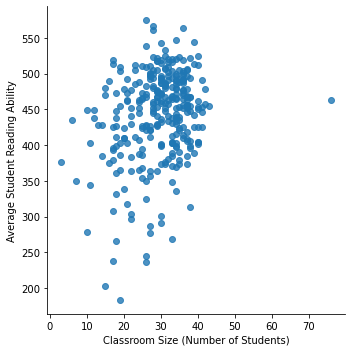

In [15]:
class_size_corr = iran_teach_good['ATBR01A'].corr(iran_teach_good['OVR_SCORE'])
print('Class size correlation to overall score: %.3f' % class_size_corr)
sctplt(iran_teach_good, 'ATBR01A', 'OVR_SCORE', 'Classroom Size (Number of Students)', 'Average Student Reading Ability', 'IRANClassSize.jpeg')

Levenes statistic: 5.923463163050999 p-value = 0.015510724432425769
Shapiro-Wilks statistic: 0.9466074705123901 p-value = 3.799017544992012e-09
KruskalResult(statistic=42.80400134146589, pvalue=6.050826616755948e-11)
Effect size: 0.1389740303294347


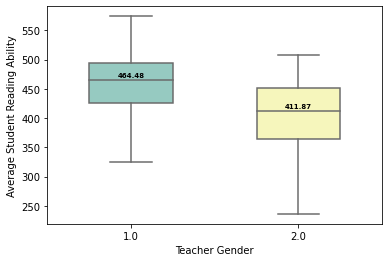

In [16]:
import statsmodels
import statsmodels.api as sm
import scipy.stats as stats
#import researchpy as rp
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt

gender = ols('OVR_SCORE ~ ATBG02', data=iran_teach_good).fit()

values_per_group = [col for col_name, col in iran_teach_good.groupby(['ATBG02'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(gender.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_teach_good.groupby("ATBG02")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_teach_good,'ATBG02','OVR_SCORE','Teacher Gender','Average Student Reading Ability','IRANTeacherGender.jpeg')

Levenes statistic: 2.779869360807329 p-value = 0.01794238562178143
Shapiro-Wilks statistic: 0.9492809176445007 p-value = 7.729533457734306e-09
KruskalResult(statistic=30.723708929916256, pvalue=1.062039389359658e-05)
Effect size: 0.09975230172050732


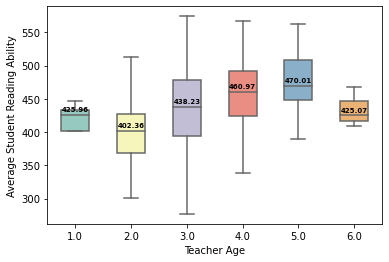

In [17]:
teach_age = ols('OVR_SCORE ~ ATBG03', data=iran_teach_good).fit()

values_per_group = [col for col_name, col in iran_teach_good.groupby(['ATBG03'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_age.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_teach_good.groupby("ATBG03")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_teach_good,'ATBG03','OVR_SCORE','Teacher Age','Average Student Reading Ability','IRANTeacherAge.jpeg')

Levenes statistic: 1.1570022023883144 p-value = 0.33040595799113537
Shapiro-Wilks statistic: 0.9433596730232239 p-value = 1.649843373030535e-09
KruskalResult(statistic=2.5894250867704613, pvalue=0.7629713375576486)
Effect size: 0.008407224307696304


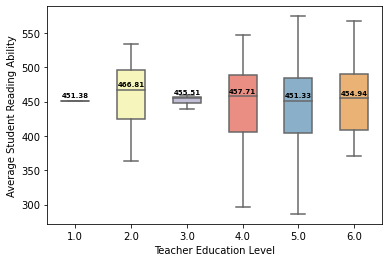

In [18]:
teach_edu = ols('OVR_SCORE ~ ATBG04', data=iran_teach_good).fit()

values_per_group = [col for col_name, col in iran_teach_good.groupby(['ATBG04'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_edu.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_teach_good.groupby("ATBG04")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_teach_good,'ATBG04','OVR_SCORE','Teacher Education Level','Average Student Reading Ability','IRANTeacherEducation.jpeg')

Levenes statistic: 0.7043756314066129 p-value = 0.5894651070151201
Shapiro-Wilks statistic: 0.93978351354599 p-value = 6.81161071991454e-10
KruskalResult(statistic=3.428207402523867, pvalue=0.48887818506883385)
Effect size: 0.01113054351468788


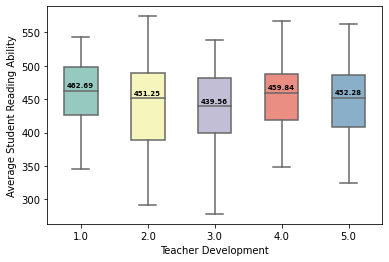

In [19]:
teach_dev = ols('OVR_SCORE ~ ATBG06', data=iran_teach_good).fit()

values_per_group = [col for col_name, col in iran_teach_good.groupby(['ATBG06'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_dev.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_teach_good.groupby("ATBG06")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_teach_good,'ATBG06','OVR_SCORE','Teacher Development','Average Student Reading Ability','IRANTeacherDevelopment.jpeg')

Levenes statistic: 2.2987965507158306 p-value = 0.10211066428254903
Shapiro-Wilks statistic: 0.9413206577301025 p-value = 9.921655719224987e-10
KruskalResult(statistic=5.611554037501151, pvalue=0.06045977453784028)
Effect size: 0.018219331290588153


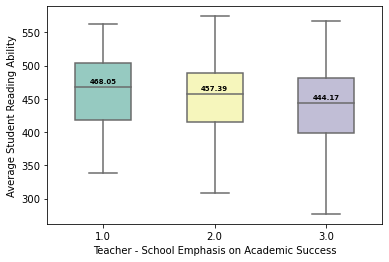

In [20]:
teach_emph_suc = ols('OVR_SCORE ~ ATDGEAS', data=iran_teach_good).fit()

values_per_group = [col for col_name, col in iran_teach_good.groupby(['ATDGEAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_emph_suc.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_teach_good.groupby("ATDGEAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_teach_good,'ATDGEAS','OVR_SCORE','Teacher - School Emphasis on Academic Success','Average Student Reading Ability','IRANTeacherEmphSucc.jpeg')

Levenes statistic: 1.0617183694510393 p-value = 0.34713153298797755
Shapiro-Wilks statistic: 0.940656840801239 p-value = 8.427948894329518e-10
KruskalResult(statistic=0.09269676768587942, pvalue=0.9547092989523713)
Effect size: 0.00030096353144766047


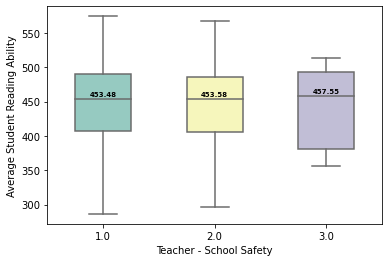

In [21]:
teach_safety = ols('OVR_SCORE ~ ATDGSOS', data=iran_teach_good).fit()

values_per_group = [col for col_name, col in iran_teach_good.groupby(['ATDGSOS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_safety.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_teach_good.groupby("ATDGSOS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_teach_good,'ATDGSOS','OVR_SCORE','Teacher - School Safety','Average Student Reading Ability','IRANTeacherSafety.jpeg')

Levenes statistic: 0.03338499181099066 p-value = 0.9671696591083416
Shapiro-Wilks statistic: 0.9400774240493774 p-value = 7.316044436933566e-10
KruskalResult(statistic=0.44444191365585084, pvalue=0.8007384161659921)
Effect size: 0.00144299322615536


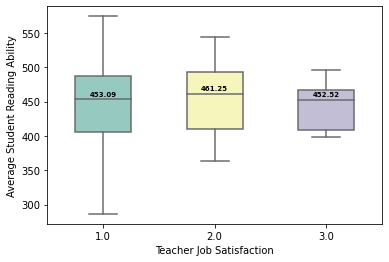

In [22]:
teach_satisf = ols('OVR_SCORE ~ ATDGTJS', data=iran_teach_good).fit()

values_per_group = [col for col_name, col in iran_teach_good.groupby(['ATDGTJS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_satisf.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_teach_good.groupby("ATDGTJS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_teach_good,'ATDGTJS','OVR_SCORE','Teacher Job Satisfaction','Average Student Reading Ability','IRANTeacherSatisf.jpeg')

### Iran School Variables

Days school open correlation to overall score: 0.068


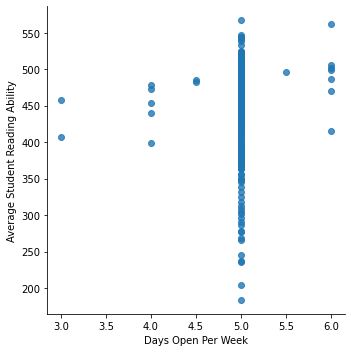

In [23]:
school_open_days = iran_school_good['ACDGDAYS'].corr(iran_school_good['OVR_SCORE'])
print('Days school open correlation to overall score: %.3f' % school_open_days)
sctplt(iran_school_good, 'ACDGDAYS', 'OVR_SCORE', 'Days Open Per Week', 'Average Student Reading Ability', 'IRANSchoolOpenDays.jpeg')

Instructional hour per year correlation to overall score: 0.118


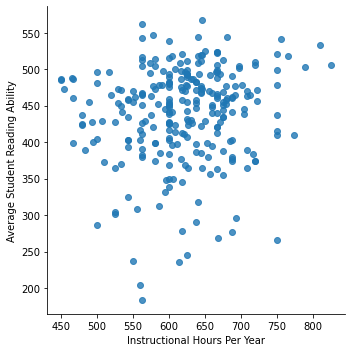

In [24]:
school_instr_hours = iran_school_good['ACDGTIHY'].corr(iran_school_good['OVR_SCORE'])
print('Instructional hour per year correlation to overall score: %.3f' % school_instr_hours)
sctplt(iran_school_good, 'ACDGTIHY', 'OVR_SCORE', 'Instructional Hours Per Year', 'Average Student Reading Ability', 'IRANSchoolInstrHours.jpeg')

Levenes statistic: 0.0018368827485444048 p-value = 0.9981648159019835
Shapiro-Wilks statistic: 0.9366841316223145 p-value = 2.33094588075744e-09
KruskalResult(statistic=0.5298979692306602, pvalue=0.7672450902808852)
Effect size: 0.0019625850712246674


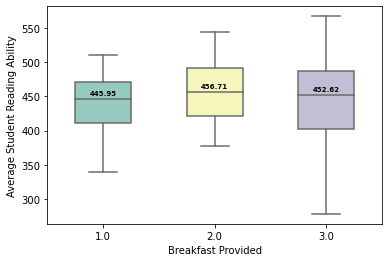

In [25]:
school_meals_b = ols('OVR_SCORE ~ ACBG06A', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACBG06A'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_meals_b.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACBG06A")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACBG06A','OVR_SCORE','Breakfast Provided','Average Student Reading Ability','IRANSchoolBreakfast.jpeg')

Levenes statistic: 2.4188924100899767 p-value = 0.12114973442725437
Shapiro-Wilks statistic: 0.9368996620178223 p-value = 6.721707190848747e-09
KruskalResult(statistic=0.3794802867383851, pvalue=0.5378815093798535)
Effect size: 0.0014054825434755003


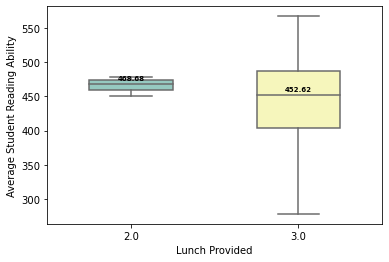

In [26]:
school_meals_l = ols('OVR_SCORE ~ ACBG06B', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACBG06B'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_meals_l.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACBG06B")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACBG06B','OVR_SCORE','Lunch Provided','Average Student Reading Ability','IRANSchoolLunch.jpeg')

Levenes statistic: 7.5013927121032955 p-value = 7.762416152191257e-05
Shapiro-Wilks statistic: 0.9496217966079712 p-value = 5.54941621544458e-08
KruskalResult(statistic=64.46179856856918, pvalue=6.538477047654216e-14)
Effect size: 0.23874740210581177


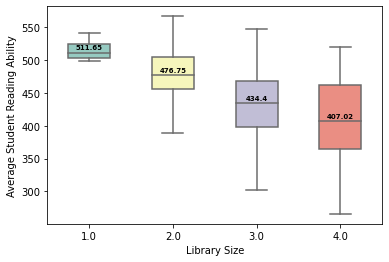

In [27]:
school_library_size = ols('OVR_SCORE ~ ACDG09', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACDG09'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_library_size.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACDG09")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACDG09','OVR_SCORE','Library Size','Average Student Reading Ability','IRANSchoolLibrary.jpeg')

Levenes statistic: 0.2430751389016731 p-value = 0.8662186430912637
Shapiro-Wilks statistic: 0.9344690442085266 p-value = 2.449235481094547e-09
KruskalResult(statistic=14.283823151877527, pvalue=0.0025432050262970585)
Effect size: 0.052903048710657506


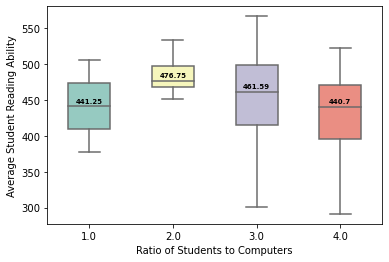

In [28]:
school_computer_resources = ols('OVR_SCORE ~ ACDG11R', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACDG11R'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_computer_resources.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACDG11R")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACDG11R','OVR_SCORE','Ratio of Students to Computers','Average Student Reading Ability','IRANSchoolComputers.jpeg')

Levenes statistic: 1.8980256708049914 p-value = 0.1518732327560064
Shapiro-Wilks statistic: 0.9340657591819763 p-value = 1.2447487485189868e-09
KruskalResult(statistic=16.522530374967005, pvalue=0.00025833194603423824)
Effect size: 0.06119455694432224


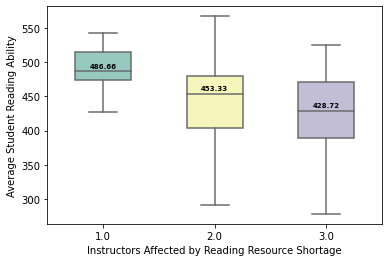

In [29]:
school_r_shortage = ols('OVR_SCORE ~ ACDGRRS', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACDGRRS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_r_shortage.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACDGRRS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACDGRRS','OVR_SCORE','Instructors Affected by Reading Resource Shortage','Average Student Reading Ability','IRANReShortage.jpeg')

Levenes statistic: 0.1986791732824867 p-value = 0.8199335079715722
Shapiro-Wilks statistic: 0.9314883947372437 p-value = 7.165745774528887e-10
KruskalResult(statistic=11.751169249710642, pvalue=0.0028071525835359624)
Effect size: 0.04352284907300238


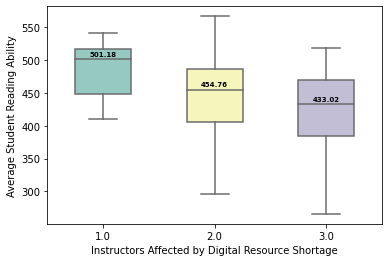

In [30]:
school_comp_shortage = ols('OVR_SCORE ~ ACDGDRS', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACDGDRS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_comp_shortage.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACDGDRS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACDGDRS','OVR_SCORE','Instructors Affected by Digital Resource Shortage','Average Student Reading Ability','IRANDigShortage.jpeg')

Levenes statistic: 1.2287238722247247 p-value = 0.2943091207084216
Shapiro-Wilks statistic: 0.9376816153526306 p-value = 2.7647255596008335e-09
KruskalResult(statistic=18.7098534384196, pvalue=8.653801859918556e-05)
Effect size: 0.06929575347562815


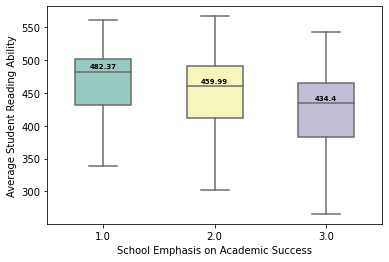

In [31]:
school_emph_suc = ols('OVR_SCORE ~ ACDGEAS', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACDGEAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_emph_suc.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACDGEAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACDGEAS','OVR_SCORE','School Emphasis on Academic Success','Average Student Reading Ability','IRANSchoolEmph.jpeg')

Levenes statistic: 0.32542240983251897 p-value = 0.7225082611439801
Shapiro-Wilks statistic: 0.9371312260627747 p-value = 2.574817470346602e-09
KruskalResult(statistic=22.64815634692502, pvalue=1.2078564884554042e-05)
Effect size: 0.08388206054416675


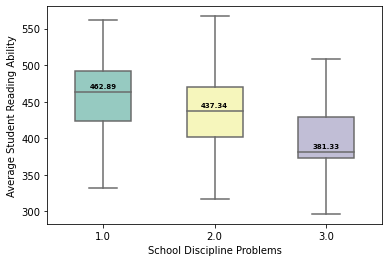

In [32]:
school_discipline = ols('OVR_SCORE ~ ACDGDAS', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACDGDAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_discipline.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACDGDAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACDGDAS','OVR_SCORE','School Discipline Problems','Average Student Reading Ability','IRANSchoolDisc.jpeg')

Principal experience correlation to overall score: 0.118


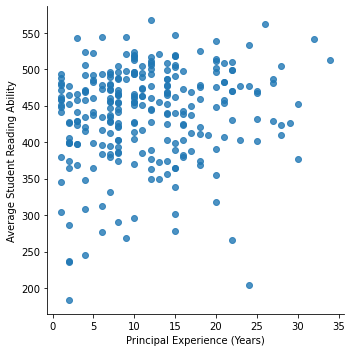

In [33]:
school_experience = iran_school_good['ACBG18'].corr(iran_school_good['OVR_SCORE'])
print('Principal experience correlation to overall score: %.3f' % school_instr_hours)
sctplt(iran_school_good, 'ACBG18', 'OVR_SCORE', 'Principal Experience (Years)', 'Average Student Reading Ability', 'IRANSchoolExp.jpeg')

Levenes statistic: 1.1254971823650035 p-value = 0.32601990955094917
Shapiro-Wilks statistic: 0.9376101493835449 p-value = 2.720699443514718e-09
KruskalResult(statistic=0.823532614283863, pvalue=0.6624790745921131)
Effect size: 0.0030501207936439374


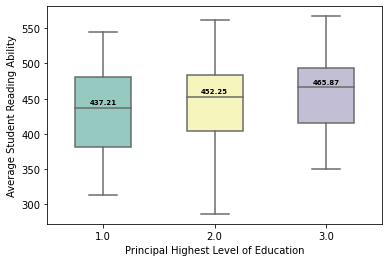

In [34]:
school_princip_edu = ols('OVR_SCORE ~ ACBG20', data=iran_school_good).fit()

values_per_group = [col for col_name, col in iran_school_good.groupby(['ACBG20'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_princip_edu.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in iran_school_good.groupby("ACBG20")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(iran_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(iran_school_good,'ACBG20','OVR_SCORE','Principal Highest Level of Education','Average Student Reading Ability','IRANSchoolEdu.jpeg')

## Azerbaijan

### Azerbaijan Teacher Variables

Teaching experience correlation to overall score: -0.010


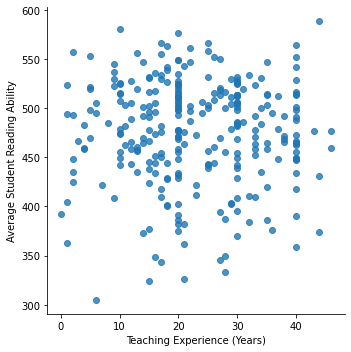

In [35]:
teach_exp_corr = aze_teach_good['ATBG01'].corr(aze_teach_good['OVR_SCORE'])
print('Teaching experience correlation to overall score: %.3f' % teach_exp_corr)
sctplt(aze_teach_good, 'ATBG01', 'OVR_SCORE', 'Teaching Experience (Years)', 'Average Student Reading Ability', 'AZETeachExp.jpeg')

Class size correlation to overall score: 0.260


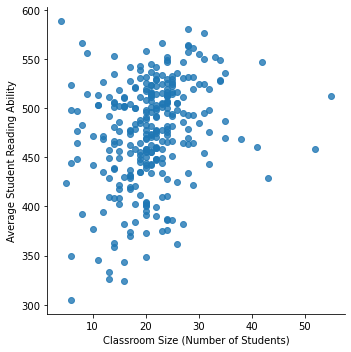

In [36]:
class_size_corr = aze_teach_good['ATBR01A'].corr(aze_teach_good['OVR_SCORE'])
print('Class size correlation to overall score: %.3f' % class_size_corr)
sctplt(aze_teach_good, 'ATBR01A', 'OVR_SCORE', 'Classroom Size (Number of Students)', 'Average Student Reading Ability', 'AZEClassSize.jpeg')

Levenes statistic: 4.25220903890286 p-value = 0.0400748434781055
Shapiro-Wilks statistic: 0.9760707020759583 p-value = 7.212570926640183e-05
KruskalResult(statistic=5.341379229707968, pvalue=0.020824990234512147)
Effect size: 0.01798444185086858


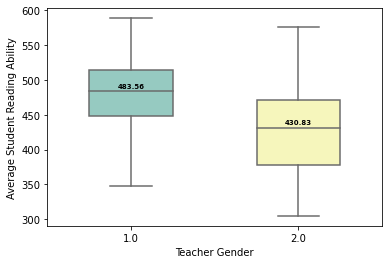

In [37]:
gender = ols('OVR_SCORE ~ ATBG02', data=aze_teach_good).fit()

values_per_group = [col for col_name, col in aze_teach_good.groupby(['ATBG02'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(gender.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_teach_good.groupby("ATBG02")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_teach_good)))

bxplt(aze_teach_good,'ATBG02','OVR_SCORE','Teacher Gender','Average Student Reading Ability','AZETeacherGender.jpeg')

Levenes statistic: 0.6408305565964124 p-value = 0.6687182970878744
Shapiro-Wilks statistic: 0.9707108736038208 p-value = 9.234305252903141e-06
KruskalResult(statistic=1.84139503041456, pvalue=0.8706268394034975)
Effect size: 0.006199983267389091


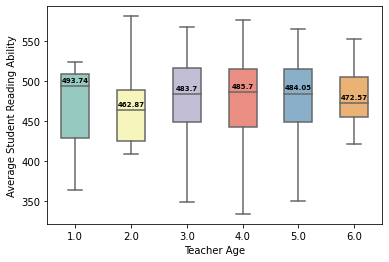

In [38]:
teach_age = ols('OVR_SCORE ~ ATBG03', data=aze_teach_good).fit()

values_per_group = [col for col_name, col in aze_teach_good.groupby(['ATBG03'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_age.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_teach_good.groupby("ATBG03")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_teach_good)))

bxplt(aze_teach_good,'ATBG03','OVR_SCORE','Teacher Age','Average Student Reading Ability','AZETeacherAge.jpeg')

Levenes statistic: 0.9926571754196623 p-value = 0.42249704855388626
Shapiro-Wilks statistic: 0.968738317489624 p-value = 7.073735105223022e-06
KruskalResult(statistic=18.62241217669873, pvalue=0.0022594822834558384)
Effect size: 0.06270172450066913


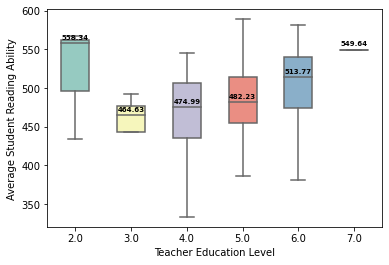

In [39]:
teach_edu = ols('OVR_SCORE ~ ATBG04', data=aze_teach_good).fit()

values_per_group = [col for col_name, col in aze_teach_good.groupby(['ATBG04'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_edu.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_teach_good.groupby("ATBG04")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_teach_good)))

bxplt(aze_teach_good,'ATBG04','OVR_SCORE','Teacher Education Level','Average Student Reading Ability','AZETeacherEducation.jpeg')

Levenes statistic: 1.74369517205748 p-value = 0.1404890551006443
Shapiro-Wilks statistic: 0.971832275390625 p-value = 2.0179453713353723e-05
KruskalResult(statistic=4.106097788395232, pvalue=0.39183746101709105)
Effect size: 0.013825245078771824


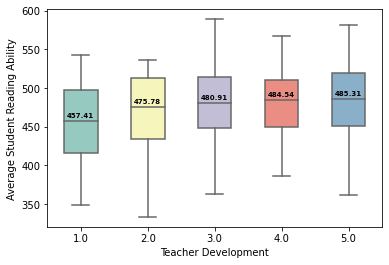

In [40]:
teach_dev = ols('OVR_SCORE ~ ATBG06', data=aze_teach_good).fit()

values_per_group = [col for col_name, col in aze_teach_good.groupby(['ATBG06'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_dev.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_teach_good.groupby("ATBG06")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_teach_good)))

bxplt(aze_teach_good,'ATBG06','OVR_SCORE','Teacher Development','Average Student Reading Ability','AZETeacherDevelopment.jpeg')

Levenes statistic: 0.1468600173148303 p-value = 0.8634790049854854
Shapiro-Wilks statistic: 0.9679069519042969 p-value = 4.129424269194715e-06
KruskalResult(statistic=9.904559109673642, pvalue=0.007067280299998099)
Effect size: 0.03334868387095502


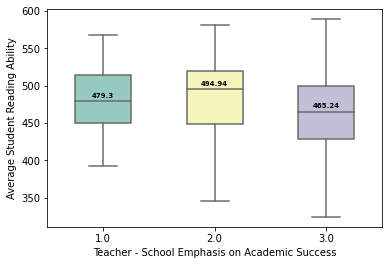

In [41]:
teach_emph_suc = ols('OVR_SCORE ~ ATDGEAS', data=aze_teach_good).fit()

values_per_group = [col for col_name, col in aze_teach_good.groupby(['ATDGEAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_emph_suc.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_teach_good.groupby("ATDGEAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_teach_good)))

bxplt(aze_teach_good,'ATDGEAS','OVR_SCORE','Teacher - School Emphasis on Academic Success','Average Student Reading Ability','AZETeacherEmphSucc.jpeg')

Levenes statistic: 2.6207884015776157 p-value = 0.07446211126320819
Shapiro-Wilks statistic: 0.9678710699081421 p-value = 3.9332085179921705e-06
KruskalResult(statistic=3.7001806662769923, pvalue=0.1572229632284206)
Effect size: 0.012458520761875395


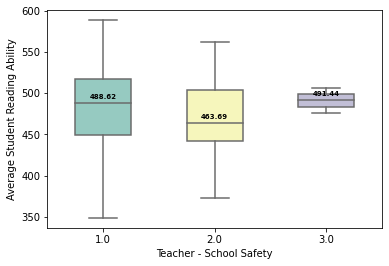

In [42]:
teach_safety = ols('OVR_SCORE ~ ATDGSOS', data=aze_teach_good).fit()

values_per_group = [col for col_name, col in aze_teach_good.groupby(['ATDGSOS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_safety.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_teach_good.groupby("ATDGSOS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_teach_good)))

bxplt(aze_teach_good,'ATDGSOS','OVR_SCORE','Teacher - School Safety','Average Student Reading Ability','AZETeacherSafety.jpeg')

Levenes statistic: 0.8416997073003124 p-value = 0.4320238469796853
Shapiro-Wilks statistic: 0.9690597057342529 p-value = 5.923401658947114e-06
KruskalResult(statistic=3.611906667476319, pvalue=0.16431773224580062)
Effect size: 0.012161301910694677


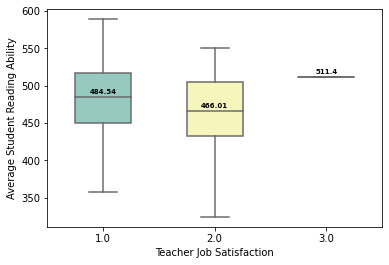

In [43]:
teach_satisf = ols('OVR_SCORE ~ ATDGTJS', data=aze_teach_good).fit()

values_per_group = [col for col_name, col in aze_teach_good.groupby(['ATDGTJS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_satisf.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_teach_good.groupby("ATDGTJS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_teach_good)))

bxplt(aze_teach_good,'ATDGTJS','OVR_SCORE','Teacher Job Satisfaction','Average Student Reading Ability','AZETeacherSatisf.jpeg')

### Azerbaijan School Variables

Days school open correlation to overall score: -0.046


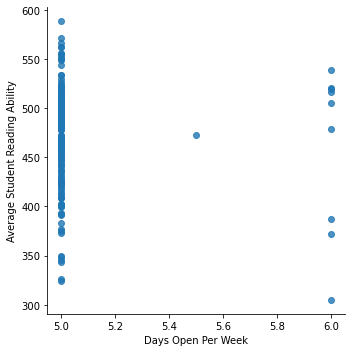

In [44]:
school_open_days = aze_school_good['ACDGDAYS'].corr(aze_school_good['OVR_SCORE'])
print('Days school open correlation to overall score: %.3f' % school_open_days)
sctplt(aze_school_good, 'ACDGDAYS', 'OVR_SCORE', 'Days Open Per Week', 'Average Student Reading Ability', 'AZESchoolOpenDays.jpeg')

Instructional hour per year correlation to overall score: 0.084


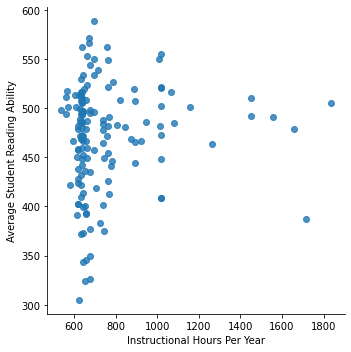

In [45]:
school_instr_hours = aze_school_good['ACDGTIHY'].corr(aze_school_good['OVR_SCORE'])
print('Instructional hour per year correlation to overall score: %.3f' % school_instr_hours)
sctplt(aze_school_good, 'ACDGTIHY', 'OVR_SCORE', 'Instructional Hours Per Year', 'Average Student Reading Ability', 'AZESchoolInstrHours.jpeg')

Levenes statistic: 1.7509256265713475 p-value = 0.17698607740076416
Shapiro-Wilks statistic: 0.9768515825271606 p-value = 0.008659525774419308
KruskalResult(statistic=2.9262780697563358, pvalue=0.23150841994185117)
Effect size: 0.017315254850629205


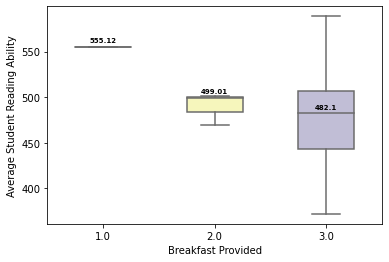

In [46]:
school_meals_b = ols('OVR_SCORE ~ ACBG06A', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACBG06A'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_meals_b.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACBG06A")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACBG06A','OVR_SCORE','Breakfast Provided','Average Student Reading Ability','AZESchoolBreakfast.jpeg')

Levenes statistic: 0.8588029634213634 p-value = 0.4258885875231684
Shapiro-Wilks statistic: 0.9817137718200684 p-value = 0.05316067859530449
KruskalResult(statistic=1.7420484105267064, pvalue=0.4185226765301473)
Effect size: 0.010307978760513056


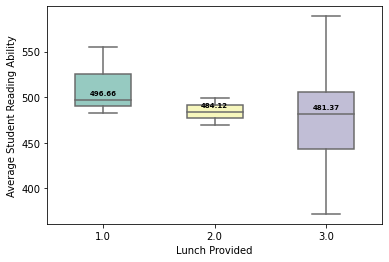

In [47]:
school_meals_l = ols('OVR_SCORE ~ ACBG06B', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACBG06B'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_meals_l.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACBG06B")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACBG06B','OVR_SCORE','Lunch Provided','Average Student Reading Ability','AZESchoolLunch.jpeg')

Levenes statistic: 1.5011805112713992 p-value = 0.2259888490276811
Shapiro-Wilks statistic: 0.9698799848556519 p-value = 0.0012723320396617055
KruskalResult(statistic=1.483483740127781, pvalue=0.4762835684628115)
Effect size: 0.008778010296614088


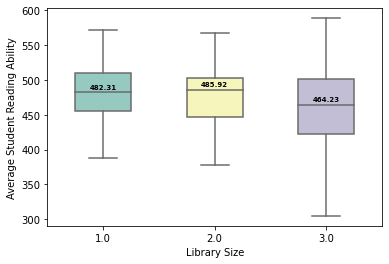

In [48]:
school_library_size = ols('OVR_SCORE ~ ACDG09', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACDG09'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_library_size.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACDG09")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACDG09','OVR_SCORE','Library Size','Average Student Reading Ability','AZESchoolLibrary.jpeg')

Levenes statistic: 7.025781362136977 p-value = 0.0001886180006983173
Shapiro-Wilks statistic: 0.9665602445602417 p-value = 0.0008986411266960204
KruskalResult(statistic=14.599158610937991, pvalue=0.0021933047374089656)
Effect size: 0.08638555391087568


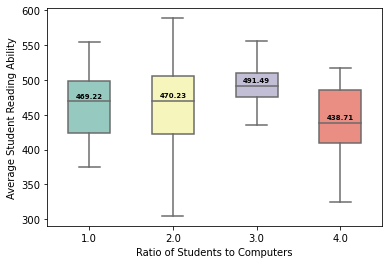

In [49]:
school_computer_resources = ols('OVR_SCORE ~ ACDG11R', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACDG11R'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_computer_resources.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACDG11R")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACDG11R','OVR_SCORE','Ratio of Students to Computers','Average Student Reading Ability','AZESchoolComputers.jpeg')

Levenes statistic: 0.10385265398841576 p-value = 0.9014184311830241
Shapiro-Wilks statistic: 0.9649732708930969 p-value = 0.000369516754290089
KruskalResult(statistic=7.726928918806095, pvalue=0.020995136582218632)
Effect size: 0.04572147289234376


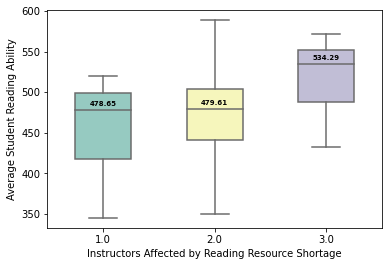

In [50]:
school_r_shortage = ols('OVR_SCORE ~ ACDGRRS', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACDGRRS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_r_shortage.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACDGRRS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACDGRRS','OVR_SCORE','Instructors Affected by Reading Resource Shortage','Average Student Reading Ability','AZEReShortage.jpeg')

Levenes statistic: 2.9566971748367656 p-value = 0.05483814253321191
Shapiro-Wilks statistic: 0.9744757413864136 p-value = 0.0041328733786940575
KruskalResult(statistic=12.942278591364186, pvalue=0.0015474617118006791)
Effect size: 0.0765815301264153


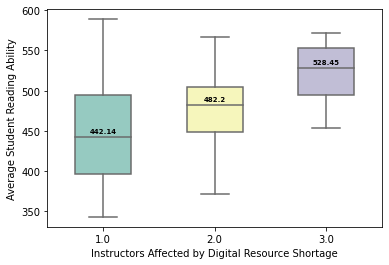

In [51]:
school_comp_shortage = ols('OVR_SCORE ~ ACDGDRS', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACDGDRS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_comp_shortage.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACDGDRS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACDGDRS','OVR_SCORE','Instructors Affected by Digital Resource Shortage','Average Student Reading Ability','AZEDigShortage.jpeg')

Levenes statistic: 2.6151973207537025 p-value = 0.07624015874424399
Shapiro-Wilks statistic: 0.9680725932121277 p-value = 0.0007450914708897471
KruskalResult(statistic=8.272698919960646, pvalue=0.01598108473786055)
Effect size: 0.04895088118319909


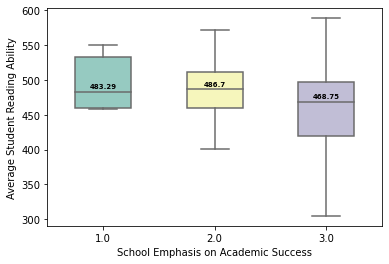

In [52]:
school_emph_suc = ols('OVR_SCORE ~ ACDGEAS', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACDGEAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_emph_suc.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACDGEAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACDGEAS','OVR_SCORE','School Emphasis on Academic Success','Average Student Reading Ability','AZESchoolEmph.jpeg')

Levenes statistic: 2.352111891407259 p-value = 0.09843055566764634
Shapiro-Wilks statistic: 0.9671249985694885 p-value = 0.0006183556979522109
KruskalResult(statistic=5.659948470427082, pvalue=0.05901437414260822)
Effect size: 0.03349081935163954


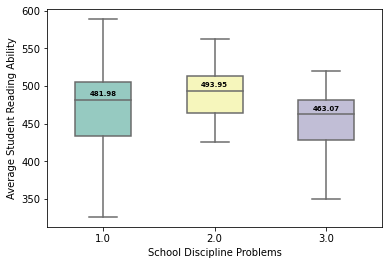

In [53]:
school_discipline = ols('OVR_SCORE ~ ACDGDAS', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACDGDAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_discipline.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACDGDAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACDGDAS','OVR_SCORE','School Discipline Problems','Average Student Reading Ability','AZESchoolDisc.jpeg')


Principal experience correlation to overall score: 0.084


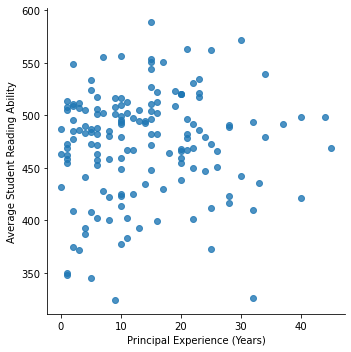

In [54]:
school_experience = aze_school_good['ACBG18'].corr(aze_school_good['OVR_SCORE'])
print('Principal experience correlation to overall score: %.3f' % school_instr_hours)
sctplt(aze_school_good, 'ACBG18', 'OVR_SCORE', 'Principal Experience (Years)', 'Average Student Reading Ability', 'AZESchoolExp.jpeg')

Levenes statistic: 3.3318700051304484 p-value = 0.03817537462756636
Shapiro-Wilks statistic: 0.9785043001174927 p-value = 0.011073479428887367
KruskalResult(statistic=13.222615453983394, pvalue=0.0013450720117974785)
Effect size: 0.07824032813007925


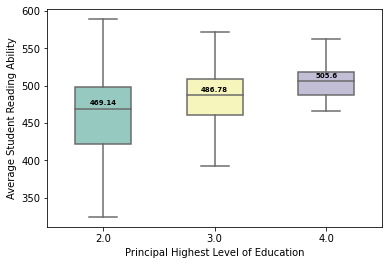

In [55]:
school_princip_edu = ols('OVR_SCORE ~ ACBG20', data=aze_school_good).fit()

values_per_group = [col for col_name, col in aze_school_good.groupby(['ACBG20'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_princip_edu.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in aze_school_good.groupby("ACBG20")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(aze_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(aze_school_good,'ACBG20','OVR_SCORE','Principal Highest Level of Education','Average Student Reading Ability','AZESchoolEdu.jpeg')

## Norway

### Norway Teacher Variables

Teaching experience correlation to overall score: 0.043


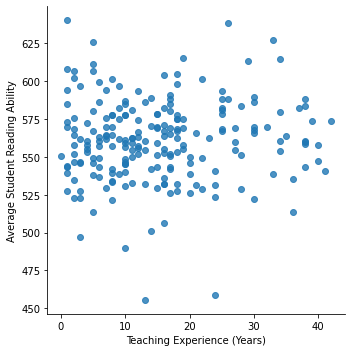

In [56]:
teach_exp_corr = nor_teach_good['ATBG01'].corr(nor_teach_good['OVR_SCORE'])
print('Teaching experience correlation to overall score: %.3f' % teach_exp_corr)
sctplt(nor_teach_good, 'ATBG01', 'OVR_SCORE', 'Teaching Experience (Years)', 'Average Student Reading Ability', 'NORTeachExp.jpeg')

Class size correlation to overall score: 0.128


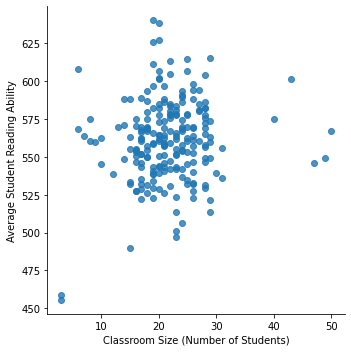

In [57]:
class_size_corr = nor_teach_good['ATBR01A'].corr(nor_teach_good['OVR_SCORE'])
print('Class size correlation to overall score: %.3f' % class_size_corr)
sctplt(nor_teach_good, 'ATBR01A', 'OVR_SCORE', 'Classroom Size (Number of Students)', 'Average Student Reading Ability', 'NORClassSize.jpeg')

Levenes statistic: 1.2249359838265301 p-value = 0.2696483861209433
Shapiro-Wilks statistic: 0.9796804189682007 p-value = 0.003502408042550087
KruskalResult(statistic=0.19558139534888141, pvalue=0.6583113079854976)
Effect size: 0.0009139317539667356


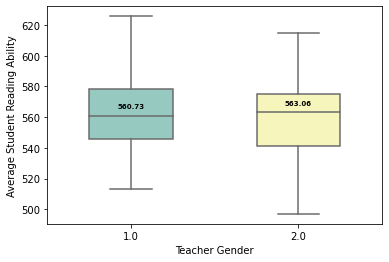

In [58]:
gender = ols('OVR_SCORE ~ ATBG02', data=nor_teach_good).fit()

values_per_group = [col for col_name, col in nor_teach_good.groupby(['ATBG02'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(gender.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_teach_good.groupby("ATBG02")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_teach_good)))

bxplt(nor_teach_good,'ATBG02','OVR_SCORE','Teacher Gender','Average Student Reading Ability','NORTeacherGender.jpeg')

Levenes statistic: 0.7542014773859819 p-value = 0.5838593829561401
Shapiro-Wilks statistic: 0.9793196320533752 p-value = 0.0030977721326053143
KruskalResult(statistic=3.6039511841983085, pvalue=0.607720137152908)
Effect size: 0.016840893384104244


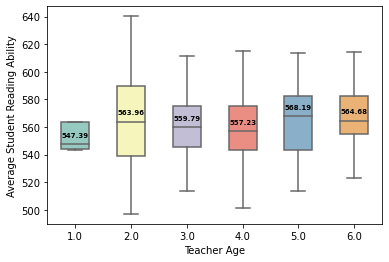

In [59]:
teach_age = ols('OVR_SCORE ~ ATBG03', data=nor_teach_good).fit()

values_per_group = [col for col_name, col in nor_teach_good.groupby(['ATBG03'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_age.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_teach_good.groupby("ATBG03")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_teach_good,'ATBG03','OVR_SCORE','Teacher Age','Average Student Reading Ability','NORTeacherAge.jpeg')

Levenes statistic: 0.9786758491855961 p-value = 0.42012801896569596
Shapiro-Wilks statistic: 0.9796376824378967 p-value = 0.0034517187159508467
KruskalResult(statistic=5.225109089997204, pvalue=0.2649698076951918)
Effect size: 0.024416397616809363


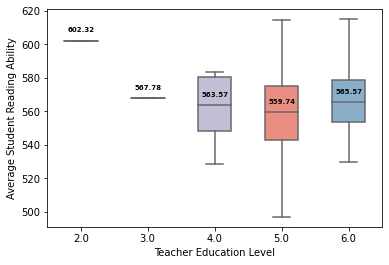

In [60]:
teach_edu = ols('OVR_SCORE ~ ATBG04', data=nor_teach_good).fit()

values_per_group = [col for col_name, col in nor_teach_good.groupby(['ATBG04'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_edu.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_teach_good.groupby("ATBG04")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_teach_good,'ATBG04','OVR_SCORE','Teacher Education Level','Average Student Reading Ability','NORTeacherEducation.jpeg')

Levenes statistic: 0.3439937970811099 p-value = 0.8480081220641955
Shapiro-Wilks statistic: 0.980628490447998 p-value = 0.004850604105740786
KruskalResult(statistic=6.6493268559027, pvalue=0.15562140526597)
Effect size: 0.031071620821975236


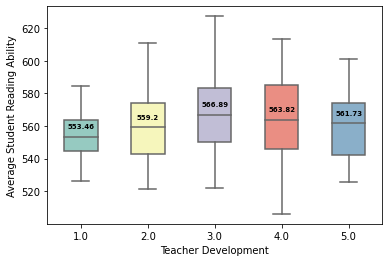

In [61]:
teach_dev = ols('OVR_SCORE ~ ATBG06', data=nor_teach_good).fit()

values_per_group = [col for col_name, col in nor_teach_good.groupby(['ATBG06'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_dev.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_teach_good.groupby("ATBG06")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_teach_good,'ATBG06','OVR_SCORE','Teacher Development','Average Student Reading Ability','NORTeacherDevelopment.jpeg')

Levenes statistic: 0.15494563503098072 p-value = 0.8565590984859872
Shapiro-Wilks statistic: 0.9808624386787415 p-value = 0.005260022357106209
KruskalResult(statistic=19.248155548062073, pvalue=6.611745515499959e-05)
Effect size: 0.08994465209374801


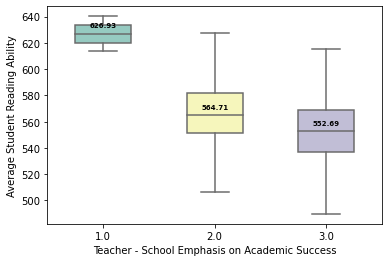

In [62]:
teach_emph_suc = ols('OVR_SCORE ~ ATDGEAS', data=nor_teach_good).fit()

values_per_group = [col for col_name, col in nor_teach_good.groupby(['ATDGEAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_emph_suc.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_teach_good.groupby("ATDGEAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_teach_good,'ATDGEAS','OVR_SCORE','Teacher - School Emphasis on Academic Success','Average Student Reading Ability','NORTeacherEmphSucc.jpeg')

Levenes statistic: 0.12354600663606753 p-value = 0.8838448651552523
Shapiro-Wilks statistic: 0.9739875793457031 p-value = 0.0005437669460661709
KruskalResult(statistic=10.773554052647114, pvalue=0.004576700175068568)
Effect size: 0.050343710526388384


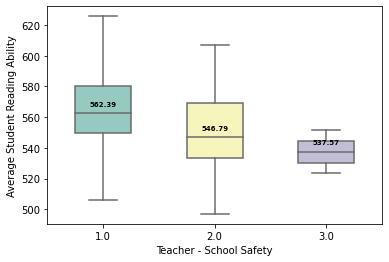

In [63]:
teach_safety = ols('OVR_SCORE ~ ATDGSOS', data=nor_teach_good).fit()

values_per_group = [col for col_name, col in nor_teach_good.groupby(['ATDGSOS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_safety.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_teach_good.groupby("ATDGSOS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_teach_good,'ATDGSOS','OVR_SCORE','Teacher - School Safety','Average Student Reading Ability','NORTeacherSafety.jpeg')

Levenes statistic: 1.3796359987793734 p-value = 0.25394163252752744
Shapiro-Wilks statistic: 0.9799833297729492 p-value = 0.004002302419394255
KruskalResult(statistic=0.9153226906244072, pvalue=0.6327617276520152)
Effect size: 0.004277208834693492


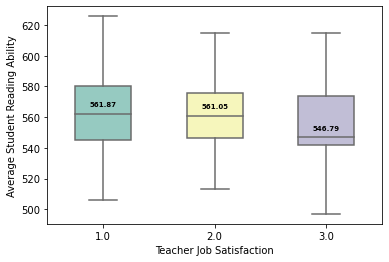

In [64]:
teach_satisf = ols('OVR_SCORE ~ ATDGTJS', data=nor_teach_good).fit()

values_per_group = [col for col_name, col in nor_teach_good.groupby(['ATDGTJS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_satisf.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_teach_good.groupby("ATDGTJS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_teach_good,'ATDGTJS','OVR_SCORE','Teacher Job Satisfaction','Average Student Reading Ability','NORTeacherSatisf.jpeg')

### Norway School Variables

Days school open correlation to overall score: 0.012


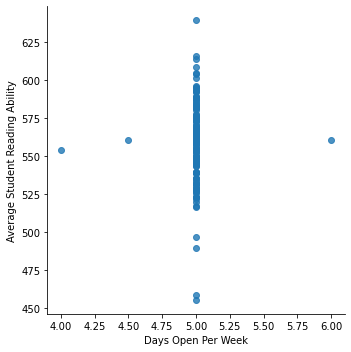

In [65]:
school_open_days = nor_school_good['ACDGDAYS'].corr(nor_school_good['OVR_SCORE'])
print('Days school open correlation to overall score: %.3f' % school_open_days)
sctplt(nor_school_good, 'ACDGDAYS', 'OVR_SCORE', 'Days Open Per Week', 'Average Student Reading Ability', 'NORSchoolOpenDays.jpeg')

Instructional hour per year correlation to overall score: 0.008


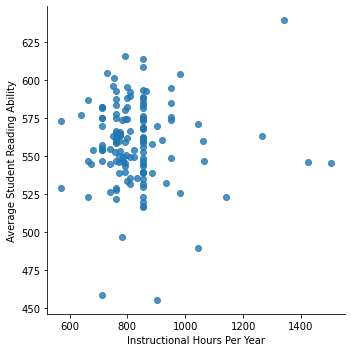

In [66]:
school_instr_hours = nor_school_good['ACDGTIHY'].corr(nor_school_good['OVR_SCORE'])
print('Instructional hour per year correlation to overall score: %.3f' % school_instr_hours)
sctplt(nor_school_good, 'ACDGTIHY', 'OVR_SCORE', 'Instructional Hours Per Year', 'Average Student Reading Ability', 'NORSchoolInstrHours.jpeg')


Levenes statistic: 1.7545667919774546 p-value = 0.17665980948946303
Shapiro-Wilks statistic: 0.9757868051528931 p-value = 0.010540571063756943
KruskalResult(statistic=4.978592357011848, pvalue=0.08296834093187515)
Effect size: 0.033413371523569456


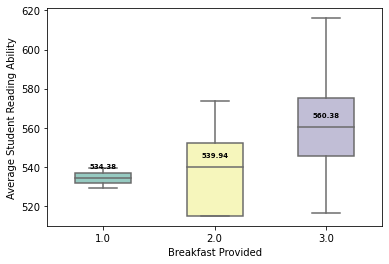

In [67]:
school_meals_b = ols('OVR_SCORE ~ ACBG06A', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACBG06A'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_meals_b.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACBG06A")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACBG06A','OVR_SCORE','Breakfast Provided','Average Student Reading Ability','NORSchoolBreakfast.jpeg')

Levenes statistic: 1.3727639037264665 p-value = 0.2567015300130037
Shapiro-Wilks statistic: 0.9839295744895935 p-value = 0.08406931161880493
KruskalResult(statistic=4.034304712876178, pvalue=0.1330337589285961)
Effect size: 0.02707587055621596


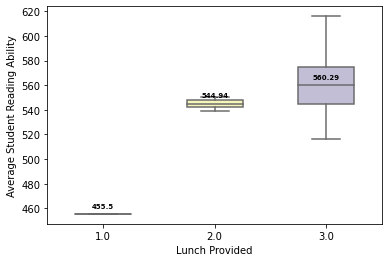

In [68]:
school_meals_l = ols('OVR_SCORE ~ ACBG06B', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACBG06B'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_meals_l.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACBG06B")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACBG06B','OVR_SCORE','Lunch Provided','Average Student Reading Ability','NORSchoolLunch.jpeg')

Levenes statistic: 0.3676778130846549 p-value = 0.7764414988507051
Shapiro-Wilks statistic: 0.9706193208694458 p-value = 0.0034489876125007868
KruskalResult(statistic=2.115518679959166, pvalue=0.5487796144093182)
Effect size: 0.014198111946034672


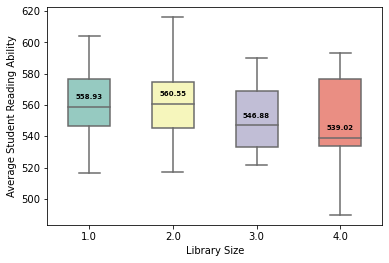

In [69]:
school_library_size = ols('OVR_SCORE ~ ACDG09', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACDG09'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_library_size.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACDG09")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACDG09','OVR_SCORE','Library Size','Average Student Reading Ability','NORSchoolLibrary.jpeg')

Levenes statistic: 0.6809446416363255 p-value = 0.5650830258914099
Shapiro-Wilks statistic: 0.9680176377296448 p-value = 0.001658353372476995
KruskalResult(statistic=2.4490642965218967, pvalue=0.4845666709088453)
Effect size: 0.01643667313101944


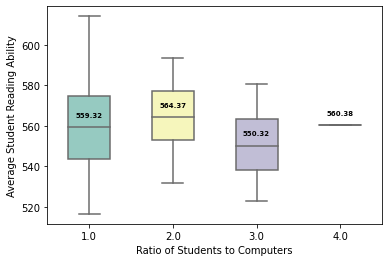

In [70]:
school_computer_resources = ols('OVR_SCORE ~ ACDG11R', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACDG11R'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_computer_resources.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACDG11R")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACDG11R','OVR_SCORE','Ratio of Students to Computers','Average Student Reading Ability','NORSchoolComputers.jpeg')


Levenes statistic: 0.9485992210876494 p-value = 0.38968962960426046
Shapiro-Wilks statistic: 0.9639194011688232 p-value = 0.0006641312502324581
KruskalResult(statistic=10.250356714043619, pvalue=0.005945156901425975)
Effect size: 0.06879434036270886


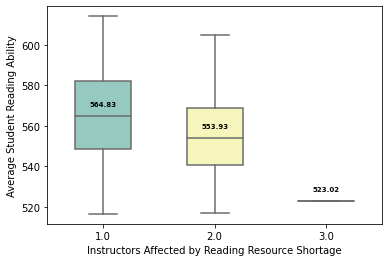

In [71]:
school_r_shortage = ols('OVR_SCORE ~ ACDGRRS', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACDGRRS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_r_shortage.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACDGRRS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACDGRRS','OVR_SCORE','Instructors Affected by Reading Resource Shortage','Average Student Reading Ability','NORReShortage.jpeg')

Levenes statistic: 0.436910290676063 p-value = 0.6468828935631243
Shapiro-Wilks statistic: 0.9647595882415771 p-value = 0.000798525579739362
KruskalResult(statistic=4.5972532186818285, pvalue=0.10039663287977574)
Effect size: 0.03085404844752905


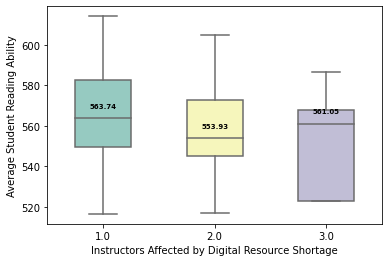

In [72]:
school_comp_shortage = ols('OVR_SCORE ~ ACDGDRS', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACDGDRS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_comp_shortage.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACDGDRS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACDGDRS','OVR_SCORE','Instructors Affected by Digital Resource Shortage','Average Student Reading Ability','NORDigShortage.jpeg')

Levenes statistic: 1.4931659308692142 p-value = 0.22811765121602734
Shapiro-Wilks statistic: 0.9447301626205444 p-value = 1.4859052498650271e-05
KruskalResult(statistic=19.321347595382747, pvalue=6.374155854387784e-05)
Effect size: 0.12967347379451508


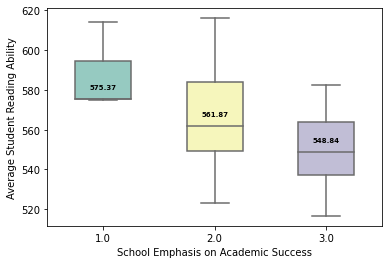

In [73]:
school_emph_suc = ols('OVR_SCORE ~ ACDGEAS', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACDGEAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_emph_suc.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACDGEAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACDGEAS','OVR_SCORE','School Emphasis on Academic Success','Average Student Reading Ability','NORSchoolEmph.jpeg')

Levenes statistic: 0.032368074667090393 p-value = 0.9681572067674618
Shapiro-Wilks statistic: 0.9632629156112671 p-value = 0.0005757332546636462
KruskalResult(statistic=5.7408168977469245, pvalue=0.05667577269606961)
Effect size: 0.038528972468100164


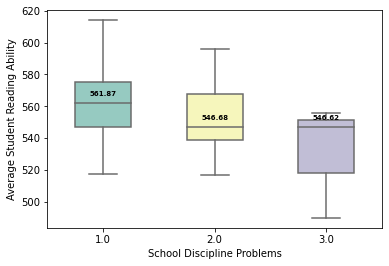

In [74]:
school_discipline = ols('OVR_SCORE ~ ACDGDAS', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACDGDAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_discipline.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACDGDAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACDGDAS','OVR_SCORE','School Discipline Problems','Average Student Reading Ability','NORSchoolDisc.jpeg')

Principal experience correlation to overall score: 0.008


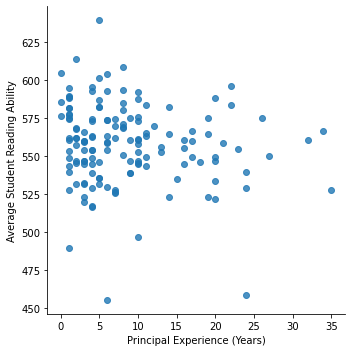

In [75]:
school_experience = nor_school_good['ACBG18'].corr(nor_school_good['OVR_SCORE'])
print('Principal experience correlation to overall score: %.3f' % school_instr_hours)
sctplt(nor_school_good, 'ACBG18', 'OVR_SCORE', 'Principal Experience (Years)', 'Average Student Reading Ability', 'NORSchoolExp.jpeg')

Levenes statistic: 0.53328877208224 p-value = 0.6601781165484945
Shapiro-Wilks statistic: 0.9707129597663879 p-value = 0.003096620552241802
KruskalResult(statistic=4.350611027141667, pvalue=0.2260088156881739)
Effect size: 0.029198731725783002


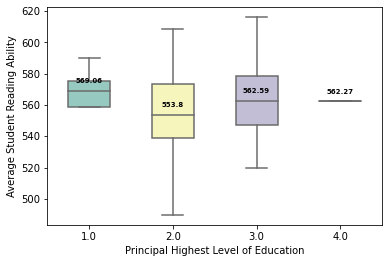

In [76]:
school_princip_edu = ols('OVR_SCORE ~ ACBG20', data=nor_school_good).fit()

values_per_group = [col for col_name, col in nor_school_good.groupby(['ACBG20'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_princip_edu.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in nor_school_good.groupby("ACBG20")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(nor_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(nor_school_good,'ACBG20','OVR_SCORE','Principal Highest Level of Education','Average Student Reading Ability','NORSchoolEdu.jpeg')

## Ireland

### Ireland Teacher Variables

Teaching experience correlation to overall score: 0.059


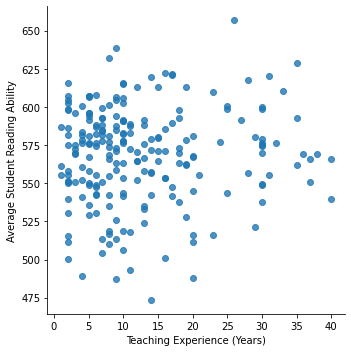

In [77]:
teach_exp_corr = irl_teach_good['ATBG01'].corr(irl_teach_good['OVR_SCORE'])
print('Teaching experience correlation to overall score: %.3f' % teach_exp_corr)
sctplt(irl_teach_good, 'ATBG01', 'OVR_SCORE', 'Teaching Experience (Years)', 'Average Student Reading Ability', 'IRLTeachExp.jpeg')

Class size correlation to overall score: 0.006


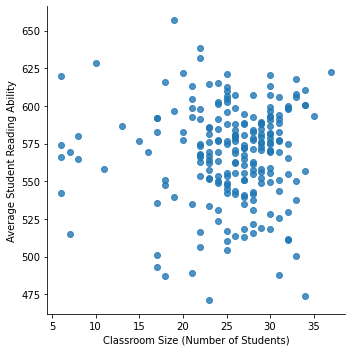

In [78]:
class_size_corr = irl_teach_good['ATBR01A'].corr(irl_teach_good['OVR_SCORE'])
print('Class size correlation to overall score: %.3f' % class_size_corr)
sctplt(irl_teach_good, 'ATBR01A', 'OVR_SCORE', 'Classroom Size (Number of Students)', 'Average Student Reading Ability', 'IRLClassSize.jpeg')

Levenes statistic: 0.8265346453741048 p-value = 0.3642897842222286
Shapiro-Wilks statistic: 0.9822611212730408 p-value = 0.007704016286879778
KruskalResult(statistic=2.1102546485163884, pvalue=0.14631496817433642)
Effect size: 0.009680067195029304


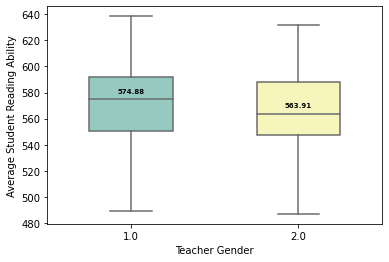

In [79]:
gender = ols('OVR_SCORE ~ ATBG02', data=irl_teach_good).fit()

values_per_group = [col for col_name, col in irl_teach_good.groupby(['ATBG02'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(gender.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_teach_good.groupby("ATBG02")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_teach_good)))

bxplt(irl_teach_good,'ATBG02','OVR_SCORE','Teacher Gender','Average Student Reading Ability','IRLTeacherGender.jpeg')

Levenes statistic: 0.857576596898332 p-value = 0.5105311410819179
Shapiro-Wilks statistic: 0.9823378920555115 p-value = 0.0077085974626243114
KruskalResult(statistic=2.637031511028681, pvalue=0.7557310418542461)
Effect size: 0.012096474821232482


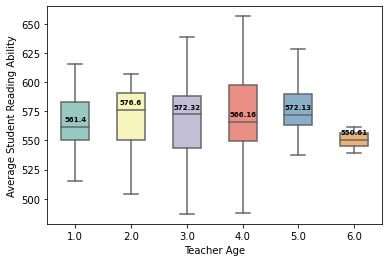

In [80]:
teach_age = ols('OVR_SCORE ~ ATBG03', data=irl_teach_good).fit()

values_per_group = [col for col_name, col in irl_teach_good.groupby(['ATBG03'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_age.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_teach_good.groupby("ATBG03")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_teach_good,'ATBG03','OVR_SCORE','Teacher Age','Average Student Reading Ability','IRLTeacherAge.jpeg')

Levenes statistic: 0.4207668754175332 p-value = 0.5172436684711341
Shapiro-Wilks statistic: 0.9816635847091675 p-value = 0.006223679054528475
KruskalResult(statistic=1.798814262466749, pvalue=0.17985591089033415)
Effect size: 0.00825144157094839


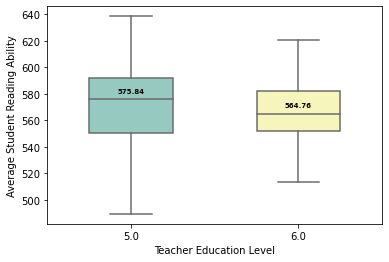

In [81]:
teach_edu = ols('OVR_SCORE ~ ATBG04', data=irl_teach_good).fit()

values_per_group = [col for col_name, col in irl_teach_good.groupby(['ATBG04'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_edu.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_teach_good.groupby("ATBG04")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_teach_good,'ATBG04','OVR_SCORE','Teacher Education Level','Average Student Reading Ability','IRLTeacherEducation.jpeg')

Levenes statistic: 1.326306563630384 p-value = 0.26125085335841797
Shapiro-Wilks statistic: 0.9827976226806641 p-value = 0.010114297270774841
KruskalResult(statistic=0.7794398917189937, pvalue=0.9411829882590257)
Effect size: 0.0035754123473348337


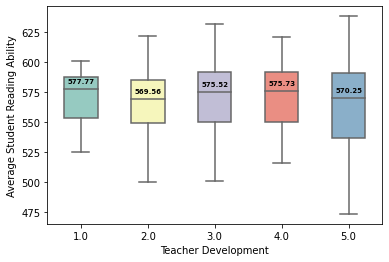

In [82]:
teach_dev = ols('OVR_SCORE ~ ATBG06', data=irl_teach_good).fit()

values_per_group = [col for col_name, col in irl_teach_good.groupby(['ATBG06'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_dev.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_teach_good.groupby("ATBG06")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_teach_good,'ATBG06','OVR_SCORE','Teacher Development','Average Student Reading Ability','IRLTeacherDevelopment.jpeg')


Levenes statistic: 1.429955921457061 p-value = 0.2415967685688126
Shapiro-Wilks statistic: 0.9823129177093506 p-value = 0.00806319247931242
KruskalResult(statistic=36.65948954624889, pvalue=1.0951988783359622e-08)
Effect size: 0.16816279608371051


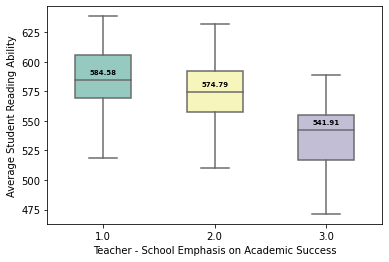

In [83]:
teach_emph_suc = ols('OVR_SCORE ~ ATDGEAS', data=irl_teach_good).fit()

values_per_group = [col for col_name, col in irl_teach_good.groupby(['ATDGEAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_emph_suc.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_teach_good.groupby("ATDGEAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_teach_good,'ATDGEAS','OVR_SCORE','Teacher - School Emphasis on Academic Success','Average Student Reading Ability','IRLTeacherEmphSucc.jpeg')

Levenes statistic: 3.5614496576327888 p-value = 0.030077206989252297
Shapiro-Wilks statistic: 0.9904457330703735 p-value = 0.15811316668987274
KruskalResult(statistic=8.246241222100139, pvalue=0.016193900644740727)
Effect size: 0.03782679459678963


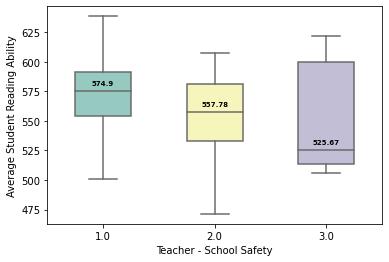

In [84]:
teach_safety = ols('OVR_SCORE ~ ATDGSOS', data=irl_teach_good).fit()

values_per_group = [col for col_name, col in irl_teach_good.groupby(['ATDGSOS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_safety.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_teach_good.groupby("ATDGSOS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_teach_good,'ATDGSOS','OVR_SCORE','Teacher - School Safety','Average Student Reading Ability','IRLTeacherSafety.jpeg')

Levenes statistic: 0.6922327240370383 p-value = 0.5015641799101018
Shapiro-Wilks statistic: 0.9793978333473206 p-value = 0.0027320683002471924
KruskalResult(statistic=4.033200715280486, pvalue=0.1331072136751984)
Effect size: 0.01850092071229581


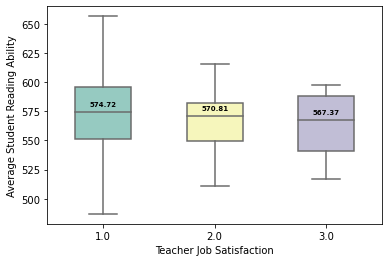

In [85]:
teach_satisf = ols('OVR_SCORE ~ ATDGTJS', data=irl_teach_good).fit()

values_per_group = [col for col_name, col in irl_teach_good.groupby(['ATDGTJS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_satisf.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_teach_good.groupby("ATDGTJS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_teach_good,'ATDGTJS','OVR_SCORE','Teacher Job Satisfaction','Average Student Reading Ability','IRLTeacherSatisf.jpeg')

### Ireland School Variables

Days school open correlation to overall score: nan


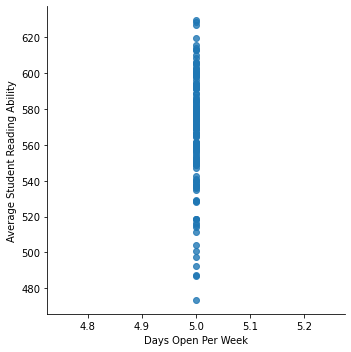

In [86]:
school_open_days = irl_school_good['ACDGDAYS'].corr(irl_school_good['OVR_SCORE'])
print('Days school open correlation to overall score: %.3f' % school_open_days)
sctplt(irl_school_good, 'ACDGDAYS', 'OVR_SCORE', 'Days Open Per Week', 'Average Student Reading Ability', 'IRLSchoolOpenDays.jpeg')

Instructional hour per year correlation to overall score: 0.040


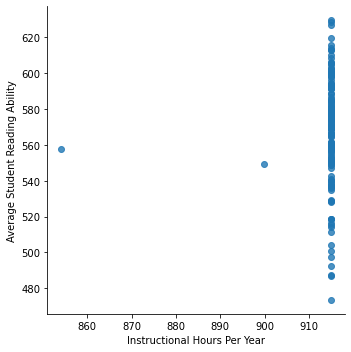

In [87]:
school_instr_hours = irl_school_good['ACDGTIHY'].corr(irl_school_good['OVR_SCORE'])
print('Instructional hour per year correlation to overall score: %.3f' % school_instr_hours)
sctplt(irl_school_good, 'ACDGTIHY', 'OVR_SCORE', 'Instructional Hours Per Year', 'Average Student Reading Ability', 'IRLSchoolInstrHours.jpeg')

Levenes statistic: 0.1454913359074659 p-value = 0.8647307904788459
Shapiro-Wilks statistic: 0.9761176705360413 p-value = 0.014802486635744572
KruskalResult(statistic=19.562839680068578, pvalue=5.6491530142351186e-05)
Effect size: 0.13308054204128283


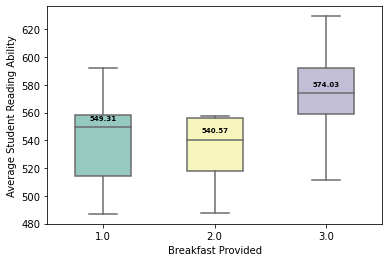

In [88]:
school_meals_b = ols('OVR_SCORE ~ ACBG06A', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACBG06A'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_meals_b.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACBG06A")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACBG06A','OVR_SCORE','Breakfast Provided','Average Student Reading Ability','IRLSchoolBreakfast.jpeg')

Levenes statistic: 2.394600142580721 p-value = 0.0949626818663059
Shapiro-Wilks statistic: 0.9839619994163513 p-value = 0.09607450664043427
KruskalResult(statistic=20.7780401157832, pvalue=3.076847109941585e-05)
Effect size: 0.14134721167199454


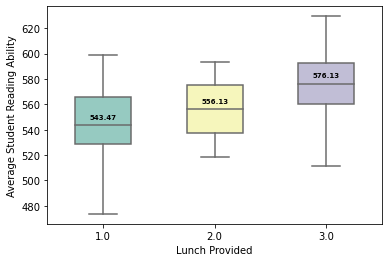

In [89]:
school_meals_l = ols('OVR_SCORE ~ ACBG06B', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACBG06B'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_meals_l.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACBG06B")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACBG06B','OVR_SCORE','Lunch Provided','Average Student Reading Ability','IRLSchoolLunch.jpeg')


Levenes statistic: 0.7672697061220383 p-value = 0.5142069191684453
Shapiro-Wilks statistic: 0.9658845663070679 p-value = 0.001183946616947651
KruskalResult(statistic=2.9285377644266077, pvalue=0.4027749880929047)
Effect size: 0.01992202560834427


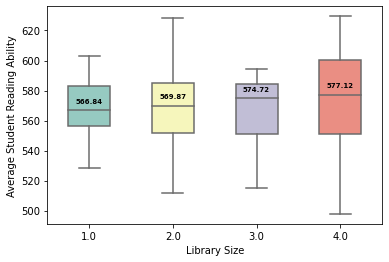

In [90]:
school_library_size = ols('OVR_SCORE ~ ACDG09', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACDG09'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_library_size.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACDG09")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACDG09','OVR_SCORE','Library Size','Average Student Reading Ability','IRLSchoolLibrary.jpeg')

Levenes statistic: 0.39752005768658694 p-value = 0.6727570203478013
Shapiro-Wilks statistic: 0.9707930684089661 p-value = 0.004269589204341173
KruskalResult(statistic=0.755204878155439, pvalue=0.685502975694813)
Effect size: 0.005137448150717272


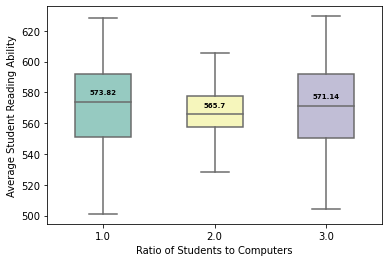

In [91]:
school_computer_resources = ols('OVR_SCORE ~ ACDG11R', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACDG11R'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_computer_resources.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACDG11R")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACDG11R','OVR_SCORE','Ratio of Students to Computers','Average Student Reading Ability','IRLSchoolComputers.jpeg')

Levenes statistic: 3.821966822175996 p-value = 0.05252146007700869
Shapiro-Wilks statistic: 0.9749460816383362 p-value = 0.00890014972537756
KruskalResult(statistic=0.11923178861951556, pvalue=0.7298691747182632)
Effect size: 0.0008111006028538473


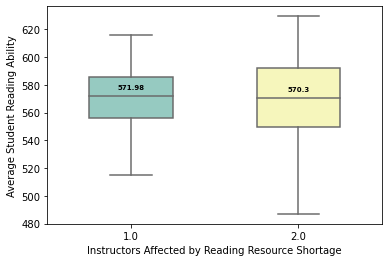

In [92]:
school_r_shortage = ols('OVR_SCORE ~ ACDGRRS', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACDGRRS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_r_shortage.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACDGRRS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACDGRRS','OVR_SCORE','Instructors Affected by Reading Resource Shortage','Average Student Reading Ability','IRLReShortage.jpeg')

Levenes statistic: 0.6931234978356865 p-value = 0.5016836830072438
Shapiro-Wilks statistic: 0.9741714000701904 p-value = 0.00737040676176548
KruskalResult(statistic=5.824352886068311, pvalue=0.054357295475991586)
Effect size: 0.039621448204546335


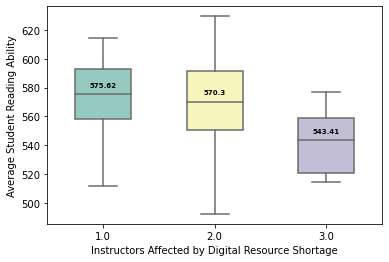

In [93]:
school_comp_shortage = ols('OVR_SCORE ~ ACDGDRS', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACDGDRS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_comp_shortage.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACDGDRS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACDGDRS','OVR_SCORE','Instructors Affected by Digital Resource Shortage','Average Student Reading Ability','IRLDigShortage.jpeg')

Levenes statistic: 2.528711574694557 p-value = 0.08334871003233274
Shapiro-Wilks statistic: 0.9864375591278076 p-value = 0.16684581339359283
KruskalResult(statistic=27.34376453842816, pvalue=1.1544549048844062e-06)
Effect size: 0.1860120036627766


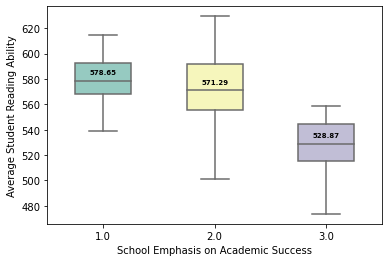

In [94]:
school_emph_suc = ols('OVR_SCORE ~ ACDGEAS', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACDGEAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_emph_suc.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACDGEAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACDGEAS','OVR_SCORE','School Emphasis on Academic Success','Average Student Reading Ability','IRLSchoolEmph.jpeg')

Levenes statistic: 1.272857574538769 p-value = 0.28320549646965126
Shapiro-Wilks statistic: 0.9907551407814026 p-value = 0.4604000747203827
KruskalResult(statistic=13.845915045128834, pvalue=0.000984912727180847)
Effect size: 0.09418989826618254


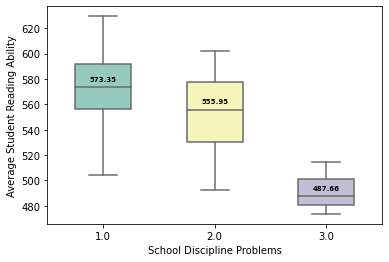

In [95]:
school_discipline = ols('OVR_SCORE ~ ACDGDAS', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACDGDAS'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_discipline.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACDGDAS")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACDGDAS','OVR_SCORE','School Discipline Problems','Average Student Reading Ability','IRLSchoolDisc.jpeg')

Principal experience correlation to overall score: 0.040


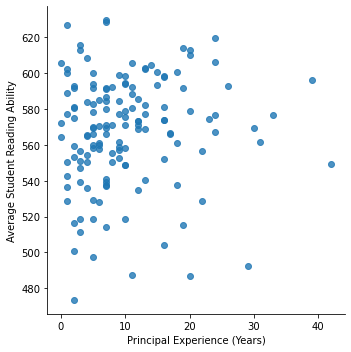

In [96]:
school_experience = irl_school_good['ACBG18'].corr(irl_school_good['OVR_SCORE'])
print('Principal experience correlation to overall score: %.3f' % school_instr_hours)
sctplt(irl_school_good, 'ACBG18', 'OVR_SCORE', 'Principal Experience (Years)', 'Average Student Reading Ability', 'IRLSchoolExp.jpeg')

Levenes statistic: 0.6581423020008091 p-value = 0.5791371822849587
Shapiro-Wilks statistic: 0.9730136394500732 p-value = 0.005575081333518028
KruskalResult(statistic=3.2179162994924013, pvalue=0.359231526129068)
Effect size: 0.02189058707137688


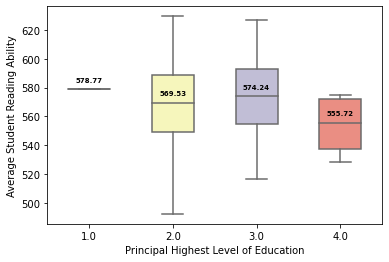

In [97]:
school_princip_edu = ols('OVR_SCORE ~ ACBG20', data=irl_school_good).fit()

values_per_group = [col for col_name, col in irl_school_good.groupby(['ACBG20'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_princip_edu.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in irl_school_good.groupby("ACBG20")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt(irl_school_good,'ACBG20','OVR_SCORE','Principal Highest Level of Education','Average Student Reading Ability','IRLSchoolEdu.jpeg')

# Between Country Comparison

Levenes statistic: 31.400265172714544 p-value = 4.1773860318955527e-19
Shapiro-Wilks statistic: 0.9543373584747314 p-value = 1.7881687734067158e-17
KruskalResult(statistic=483.80914063497994, pvalue=1.5394016582591625e-104)
Effect size: 3.2912186437753737


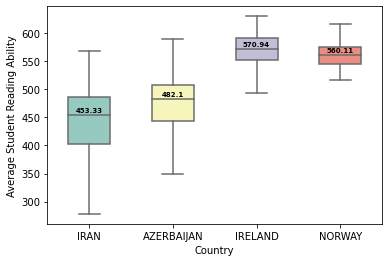

In [109]:
def bxplt2(data,predictor,outcome,xlabel,ylabel,savename):
    medians = data.groupby([predictor])[outcome].median().values
    medians[0], medians[1] = medians[1], medians[0]
    median_labels = [str(np.round(s, 2)) for s in medians]
    
    boxplot = sns.boxplot(x=predictor,y=outcome,data=data,width=0.5,palette="Set3", showfliers=False)
    
    pos = range(len(medians))
    for tick,label in zip(pos,boxplot.get_xticklabels()):
        boxplot.text(pos[tick], medians[tick] + 5, median_labels[tick], 
            horizontalalignment='center', size='x-small', color='black', weight='semibold')
    
    boxplot.set(
        xlabel=xlabel, 
        ylabel=ylabel)
    
    boxplot.figure.savefig(savename,
                    format='jpeg',
                    dpi=300)


school_scores = ols('OVR_SCORE ~ IDCNTRY', data=all_teach_good).fit()

values_per_group = [col for col_name, col in all_school_good.groupby(['IDCNTRY'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(school_scores.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in all_school_good.groupby("IDCNTRY")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_school_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt2(all_school_good,'IDCNTRY','OVR_SCORE','Country','Average Student Reading Ability','SchoolScores.jpeg')

Levenes statistic: 43.62203162190436 p-value = 1.5001136821687837e-26
Shapiro-Wilks statistic: 0.9543373584747314 p-value = 1.7881687734067158e-17
KruskalResult(statistic=672.6874938114779, pvalue=1.7549211661553875e-145)
Effect size: 3.085722448676504


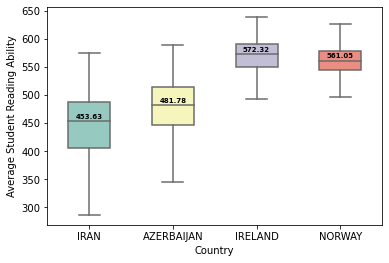

In [110]:
teach_scores = ols('OVR_SCORE ~ IDCNTRY', data=all_teach_good).fit()

values_per_group = [col for col_name, col in all_teach_good.groupby(['IDCNTRY'])['OVR_SCORE']]
w, pvalue = stats.levene(*values_per_group)
print('Levenes statistic:',w, 'p-value =', pvalue)

w, pvalue = stats.shapiro(teach_scores.resid)
print('Shapiro-Wilks statistic:',w, 'p-value =', pvalue)

krusk = stats.kruskal(*[group["OVR_SCORE"].values for name, group in all_teach_good.groupby("IDCNTRY")])
print(krusk)
print('Effect size:', epsilon2(krusk.statistic,len(irl_teach_good)))

#def bxplt(data,predictor,outcome,xlabel,ylabel,savename):
bxplt2(all_teach_good,'IDCNTRY','OVR_SCORE','Country','Average Student Reading Ability','TeacherScores.jpeg')

In [100]:
import researchpy as rp

In [101]:
table, results = rp.crosstab(all_teach_good['ATDGEAS'], all_teach_good['UN_INDEX'], prop= 'col', test= 'chi-square')
print("School emphasis on academic success - teacher index")
print(table)
print()
print(results)

School emphasis on academic success - teacher index
        UN_INDEX                
               0       1     All
ATDGEAS                         
1.0         8.80    8.58    8.71
2.0        62.62   62.18   62.44
3.0        28.57   29.23   28.85
All       100.00  100.00  100.00

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    0.0600
1                    p-value =    0.9704
2                 Cramer's V =    0.0076


In [102]:
table, results = rp.crosstab(all_school_good['ACDGEAS'], all_school_good['UN_INDEX'], prop= 'col', test= 'chi-square')
print("School emphasis on academic success - school index")
print(table)
print()
print(results)

School emphasis on academic success - school index
        UN_INDEX                
               0       1     All
ACDGEAS                         
1.0         8.49   12.67   10.16
2.0        52.98   62.33   56.73
3.0        38.53   25.00   33.10
All       100.00  100.00  100.00

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   15.3799
1                    p-value =    0.0005
2                 Cramer's V =    0.1453


In [103]:
table, results = rp.crosstab(all_school_good['ACDG09'], all_school_good['UN_INDEX'], prop= 'col', test= 'chi-square')
print("Library Size")
print(table)
print()
print(results)

Library Size
       UN_INDEX                
              0       1     All
ACDG09                         
1.0       16.24   16.32   16.27
2.0       39.21   55.90   45.90
3.0       32.02    7.29   22.11
4.0       12.53   20.49   15.72
All      100.00  100.00  100.00

                Chi-square test  results
0  Pearson Chi-square ( 3.0) =   65.1678
1                    p-value =    0.0000
2                 Cramer's V =    0.3011


In [104]:
table, results = rp.crosstab(all_school_good['ACDG11R'], all_school_good['UN_INDEX'], prop= 'col', test= 'chi-square')
print("Computer Resources")
print(table)
print()
print(results)

Computer Resources
        UN_INDEX                
               0       1     All
ACDG11R                         
1.0         9.44   72.13   35.14
2.0        14.77   15.68   15.14
3.0        42.86   11.85   30.14
4.0        32.93    0.35   19.57
All       100.00  100.00  100.00

                Chi-square test   results
0  Pearson Chi-square ( 3.0) =   335.2736
1                    p-value =     0.0000
2                 Cramer's V =     0.6921


In [105]:
table, results = rp.crosstab(all_school_good['ACDGRRS'], all_school_good['UN_INDEX'], prop= 'col', test= 'chi-square')
print("Reading Resource Shortage")
print(table)
print()
print(results)

Reading Resource Shortage
        UN_INDEX                
               0       1     All
ACDGRRS                         
1.0         6.90   40.61   20.47
2.0        81.15   59.04   72.25
3.0        11.95    0.34    7.28
All       100.00  100.00  100.00

                Chi-square test   results
0  Pearson Chi-square ( 2.0) =   141.5200
1                    p-value =     0.0000
2                 Cramer's V =     0.4409


In [106]:
table, results = rp.crosstab(all_school_good['ACDGDRS'], all_school_good['UN_INDEX'], prop= 'col', test= 'chi-square')
print("Digital Resource Shortage")
print(table)
print()
print(results)

Digital Resource Shortage
        UN_INDEX                
               0       1     All
ACDGDRS                         
1.0         8.76   31.74   18.02
2.0        73.27   64.51   69.74
3.0        17.97    3.75   12.24
All       100.00  100.00  100.00

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   82.0937
1                    p-value =    0.0000
2                 Cramer's V =    0.3360


In [107]:
table, results = rp.crosstab(all_school_good['ACDGDAS'], all_school_good['UN_INDEX'], prop= 'col', test= 'chi-square')
print("Discipline")
print(table)
print()
print(results)

Discipline
        UN_INDEX                
               0       1     All
ACDGDAS                         
1.0        69.12   79.11   73.14
2.0        22.12   18.84   20.80
3.0         8.76    2.05    6.06
All       100.00  100.00  100.00

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =   16.2176
1                    p-value =    0.0003
2                 Cramer's V =    0.1495


In [108]:
table, results = rp.crosstab(all_teach_good['ATDGSOS'], all_teach_good['UN_INDEX'], prop= 'col', test= 'chi-square')
print("Safety")
print(table)
print()
print(results)

Safety
        UN_INDEX                
               0       1     All
ATDGSOS                         
1.0        75.12   78.52   76.54
2.0        22.72   19.86   21.53
3.0         2.16    1.62    1.93
All       100.00  100.00  100.00

                Chi-square test  results
0  Pearson Chi-square ( 2.0) =    1.7163
1                    p-value =    0.4239
2                 Cramer's V =    0.0407


# Important Notes

IRAN:
- Teaching exp (minor correlation) - 0.277
- Class size (minor correlation) - 0.270
- Gender (moderate effect size - 0.13) 
- Teacher age (moderate effect size - 0.09)
- Library size (moderate effect size - 0.2387)
- Computer resources (small effect size - 0.05)
- Reading resource shortage (small effect size - 0.06)
- Digital resource shortage (small effect size - 0.04)
- School emphasis on success (small effect size - 0.07)
- School discipline (small effecti size - 0.08)

AZE:
- Class size (minor correlation) - 0.260
- Gender (small effect size - 0.018)
- Teacher education (small effect size - 0.06)
- emphasis on success - teacher (small effect size - 0.03)
- compute resources (moderate effect size  - 0.086)
- reading resource shortage (small effect size - 0.046)
- digital resource shortage (small effect size - 0.077)
- school emphasis on success (small effect size - 0.049)
- principal education level (small effect size - 0.078) 

NOR:
- class size (minor correlation - 0.128)
- teacher emphasis on success (moderate effect size - 0.09)
- Teacher safety (small effect size - 0.05)
- reading resource shortage (small effect size - 0.069)
- school emphasis on success (moderat effect size - 0.130)

IRL:
- emphasis on success - teacher (moderate effect size - 0.17)
- teacher safety (small effect size - 0.038)
- breakfast provided (moderate effect size - 0.133)
- lunch provided (moderate effect size - 0.141)
- emphasis on success - school (moderate effect size - 0.19)
- school discipline (moderate effect size - 0.094)


Different in:
- school emphasis on acadmeic success
- library size
- computer resources
- reading resource shortage
- computer resource shortage
- school discipline 

Same in:
- teacher emphasis on academic success
- school safety